In [1]:
library(tidyverse)
library(tidymodels)
library(broom)
library(glmnet)
library(leaps)
library(faraway)
library(mltools)
library(infer)
library(broom)
library(repr)
library(gridExtra)
library(faraway)
library(cowplot)
library(modelr)
library(dplyr)
library(broom)
library(caret)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### (1) Introduction

In recent years, data science has become an important field across a wide range of industries and contributing to the advancement of technology and decision-making processes. Salaries for data science professionals vary widely depending on factors such as experience, type of employment, and company size. For our group project, we used the “Salaries for Data Science Jobs” dataset obtained and compiled by Ruchi Bhatia from Kaggle. This dataset provides detailed information on job titles, salaries, employment types, and company characteristics, making it a valuable resource for addressing these questions.
Each member of our group approached the dataset with a unique perspective and analysis method:
    
- Member 1: Applied Multiple Linear Regression to explore the relationships between experience level, remote work ratio, and salary.

- Member 2: Used Lasso Regression with cross-validation to identify significant predictors of salary, focusing on job title, experience level, company location, and employee residence.
- Member 3: Employed Ridge Logistic Regression to classify salaries as above or below the median, focusing on predictors such as employment type, company size, and country.

- Member 4: Also used Ridge Logistic Regression to address multicollinearity issues and improve model stability for similar classification tasks.

After discussing our findings and objectives, we agreed to focus on Ridge Logistic Regression because it effectively addresses multicollinearity among predictors, ensuring stable and reliable coefficient estimates. 
Research question: How does experience level, employment type and company size affect the salary of an employee?”
This research question aligns with already existing literature. For instance, Shambrook et al. (2011) shed light on the positive effect of high experience level on higher salary. Molina-Domene & M. (2018) also investigated why there is a pay disparity between small and large-size firms, indicating that the company size could be a significant factor in determining an employee’s salary. 


Question:
This project will analyze the impact of various factors on salary levels in the field of data science. The predictive research question is: "How does experience level, employment type and company size affect the salary of an employee?" We will use salary_in_usd (salary in USD) as the response variable and explore explanatory variables such as experience_level (work experience), employment_type (employment type), and company_size (company size) to assess their influence on salary. The aim of this study is to analyze how these factors affect salary through inferential analysis and to use the model for salary prediction.
Experience Level: Work experience directly impacts salary levels. From entry-level to executive roles, increased experience often accompanies higher salaries. This data helps quantify salary differences across experience levels and provides evidence on whether experience is a major factor influencing salary.
Employment Type: Different employment types, such as full-time, part-time, contract, and freelance, may result in significant salary differences. Analyzing this variable helps us understand the salary distribution across different employment types and reveals how employment type affects salary.
Company Size: Company size may reflect the resources and compensation strategies of an organization. Generally, larger companies have more resources and may offer higher salaries, while smaller companies may be more financially constrained. This variable helps evaluate the impact of company size on salary levels, revealing the differences in salary between large and small companies.


### (2) Methods and Results

#### (a) Exploratory Data Analysis (EDA)

The Data Science Job Salaries dataset contains information of salaries for 607 observed individuals who worked in the data science field. There were 11 variables used to track information about each individuals and they are as follows;
| **Name**               | **Type** | **Description** |
|------------------------|----------|-----------------|
| `work_year`            | Integer | The year the salary was paid. |
| `experience_level`            | Char | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| `employment_type`            | Char | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance|
| `job_title`            | Char | The role worked in during the year. |
| `salary`            | Integer | The total gross salary amount paid. |
| `salary_currency`            | Char | The currency of the salary paid as an ISO 4217 currency code.|
| `salary_in_usd`            | Integer | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| `employee_residence`            | Char |Employee's primary country of residence in during the work year as an ISO 3166 country code.|
| `remote_ratio`            | Integer |The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| `company_location`            | Char | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| `company_size`            | Char | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)|


This dataset from Kaggle contains salary information for various positions in the field of data science. It is primarily used to analyze salary trends and the factors influencing compensation for data science-related roles. Covering data from several years, the dataset allows for a better observation of salary trends and fluctuations over time. In addition to salary figures, the dataset includes variables such as job title, years of experience, company size, company location, and the proportion of remote work.
The data was collected by aggregating salary information from ai-jobs.net, encompassing salary data for data science positions across different countries and regions. Salaries have been converted to USD to facilitate cross-country comparisons. Information on company size, years of experience, and remote work proportion is sourced from job descriptions or publicly available company data. With contributions from multiple countries, this dataset provides a global perspective on salary levels.

The dataset comes from this link; https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data and was sourced from https://salaries.ai-jobs.net/

In [2]:
ds_salaries = read.csv("data/ds_salaries.csv")

In [3]:
#make categorical data into factors

ds_salaries <- ds_salaries %>%
  mutate(
    experience_level = as.factor(experience_level),
    employment_type = as.factor(employment_type),
    job_title = as.factor(job_title),
    employee_residence = as.factor(employee_residence),
    company_location = as.factor(company_location),
    company_size = as.factor(company_size),
    work_year = as.factor(work_year)
  )

ds_salaries$experience_level <- factor(ds_salaries$experience_level, levels = c("EN", "MI", "SE", "EX"))
ds_salaries$company_size <- factor(ds_salaries$company_size, levels = c("S", "M", "L"))
ds_salaries$employment_type <- factor(ds_salaries$employment_type, levels = c("FL", "CT", "PT", "FT"))
ds_salaries$remote_ratio <- factor(ds_salaries$remote_ratio, levels = sort(unique(ds_salaries$remote_ratio)))
ds_salaries$work_year <- factor(ds_salaries$work_year, levels = sort(unique(ds_salaries$work_year)))


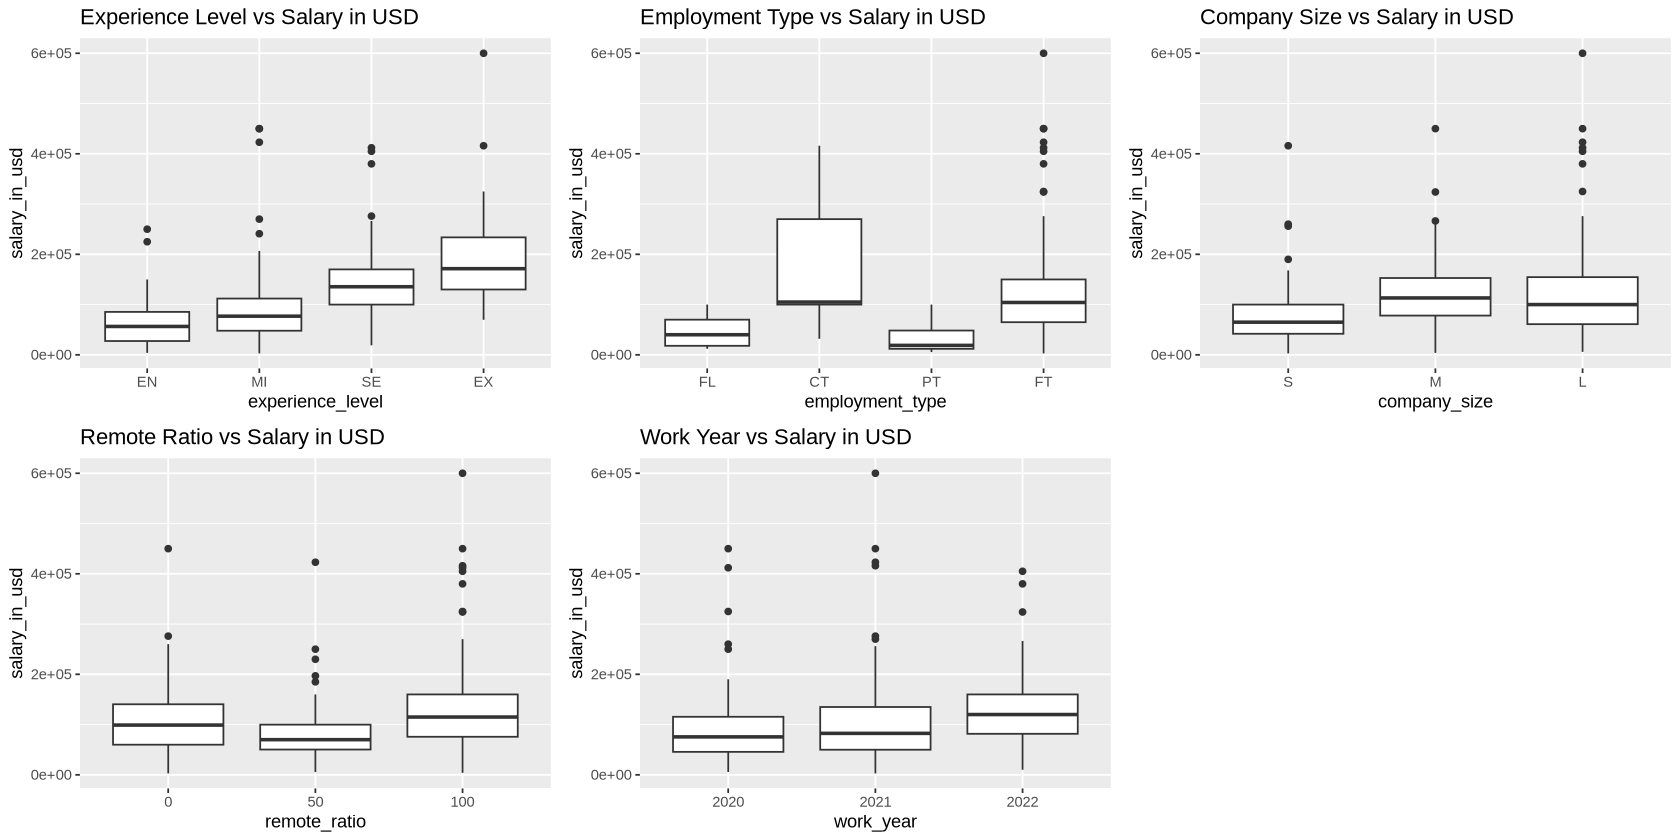

In [4]:
options(repr.plot.width = 14, repr.plot.height = 7) 
plot1 <- ggplot(ds_salaries, aes(x = experience_level, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Experience Level vs Salary in USD")

plot2 <- ggplot(ds_salaries, aes(x = employment_type, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Employment Type vs Salary in USD")

plot3 <- ggplot(ds_salaries, aes(x = company_size, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Company Size vs Salary in USD")

plot4 <- ggplot(ds_salaries, aes(x = remote_ratio, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Remote Ratio vs Salary in USD")

plot5 <- ggplot(ds_salaries, aes(x = work_year, y = salary_in_usd)) +
  geom_boxplot() +
  labs(title = "Work Year vs Salary in USD")


grid.arrange(plot1, plot2, plot3, plot4, plot5, ncol = 3)


- Experience Level: Higher levels earn more; EN has the lowest salaries.
- Employment Type: FT earns more; FL and PT have lower salaries.
- Company Size: Larger companies offer higher salaries than smaller ones.
- Remote Ratio: Fully remote (100%) shows a slightly higher salary range.
- Work Year: Salaries slightly increase over time (2020–2022).


Based on these plots, we can see that the median and spread of categories in `remote_ratio` and `work_year` overlap with eachother, making them not very good predictors. `Experience_level`, `employment_type`, and `company_size` has variations in their median and spread which make them interesting factors when predicting.

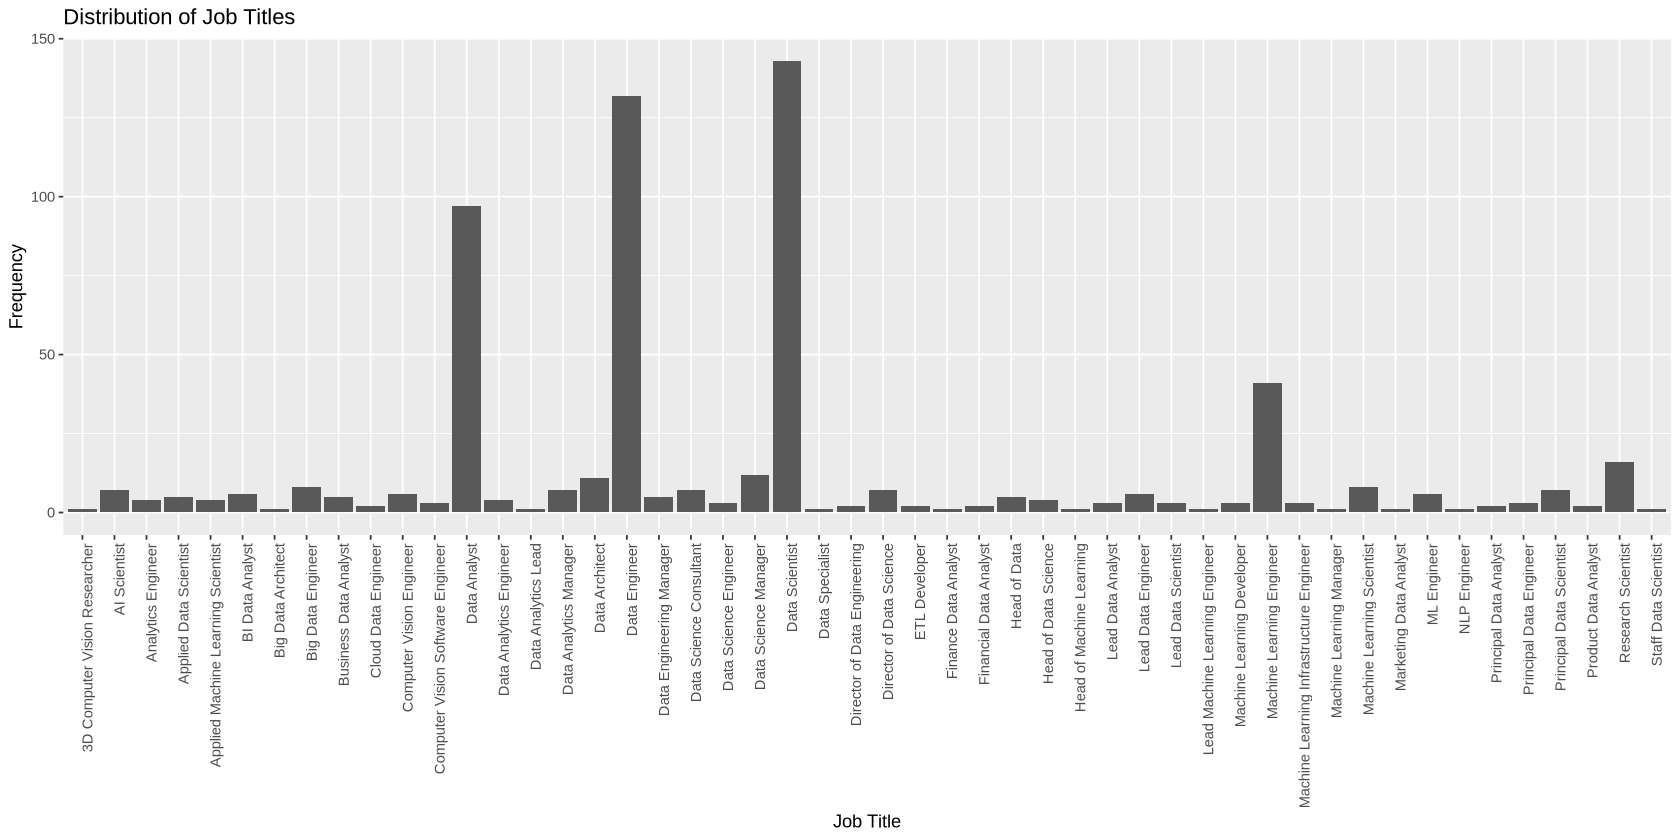

In [5]:
#Bar plot to visualize the distribution of job titles
ggplot(ds_salaries, aes(x = job_title)) +
  geom_bar() +
  labs(title = "Distribution of Job Titles",
       x = "Job Title",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

This bar chart illustrates the distribution of job titles:
- Data Scientist and Data Engineer are the most common roles, with the highest frequencies.
- Data Analyst also appears frequently, but less so compared to the top two roles.
- Other specialized roles like Machine Learning Engineer and Research Scientist are less common.

The chart highlights the dominance of general data science and engineering roles in the dataset.
However, it is worth noting that the distribution of job titles in our dataset is sparse and thus, is not the best variable to be used as a predictor.


#### (b) Methods: Plan

We will adopt a **logistic regression model** to predict whether salaries of data science professionals are above or below the median salary. Logistic regression is well-suited for binary classification tasks and provides interpretable coefficients for both categorical and numerical predictors. This approach enables us to predict how factors such as `experience_level`, `employment_type`, and `company_size` influence the probability of earning a salary above the median.

Why This Method?

Because the Logistic regression coefficients explain how each predictor impacts the odds of a salary being above the median, making the model suitable for drawing actionable conclusions. What's more, it is computationally efficient and scalable, suitable for analyzing a dataset with moderate size and complexity like ours. Since the target variable (`salary_in_usd`) is converted into a binary outcome, logistic regression is a natural choice, providing clear predictions for high and low salary groups.

The Assumptions

1. `Linearity`: The log odds of the binary outcome should have a linear relationship with the predictors.
2. `Independence`: Observations in the dataset should be independent to avoid biases.
3. `No Multicollinearity`: Predictors should not exhibit high correlations, which can distort the coefficient estimates.

The Potential Limitations
 
`Linearity Assumption`: If the log-odds relationship is not linear, the model’s predictions may be biased. Interaction terms or transformations may be needed to address this.
`Imbalanced Data`: Unequal class distributions in the binary outcome (e.g., more low salaries than high) may result in biased predictions. This can be mitigated using resampling or adjusting class weights.
`Categorical Encoding`: Improper encoding of categorical variables (e.g., creating too many dummy variables) may lead to multicollinearity or reduced interpretability.

Our Steps and plans

1. Convert `salary_in_usd` into a binary variable (1 for above the median and 0 for below the median).
2. Divide the dataset into training (80%) and testing (20%) subsets to evaluate the model's performance.
3. Convert variables such as `experience_level`, `employment_type`, and `company_size` into dummy variables or one-hot encoding.
4. Fit a logistic regression model using predictors like `experience_level`, `employment_type` and optimize variable selection by testing stepwise methods if needed.
5. Assess the model using metrics such as accuracy, precision, recall and use a confusion matrix to visualize misclassifications and evaluate performance.

For the Connection to My Research Question
Logistic regression aligns directly with the research question by identifying the factors that influence whether a salary falls above or below the median. Based on exploratory analysis:
- `Experience_level`: Higher levels of experience, such as executive (EX), are associated with significantly higher odds of earning above the median, reflecting the premium placed on seniority and expertise.
- `Employment_type`: Contract workers (CT) typically earn more, while freelancers (FL) and part-time employees (PT) earn less. This variable captures how work arrangements influence salary distribution.
- `Company_size`: Large companies (L) offer higher median salaries than smaller ones, likely due to greater financial resources and market competitiveness.




In [6]:
set.seed(123)
#standard logistic model
ds_salaries <- ds_salaries %>%  
  mutate(salary_binary = ifelse(salary_in_usd > median(salary_in_usd), 1, 0))

ds_salaries$salary_binary <- factor(ds_salaries$salary_binary, levels = c(0, 1)) # Cross-Validation (CV) Model

train_indices <- sample(seq_len(nrow(ds_salaries)), size = 0.8 * nrow(ds_salaries))
train_data <- ds_salaries[train_indices, ]
test_data <- ds_salaries[-train_indices, ]

logistic_model <- glm(salary_binary ~ experience_level + employment_type + company_size,  # Single Train-Test Split Model
                      data = train_data, family = binomial)

test_data$predicted <- predict(logistic_model, newdata = test_data, type = "response")
test_data$predicted_class <- ifelse(test_data$predicted > 0.5, 1, 0)

confusion_matrix <- confusionMatrix(factor(test_data$predicted_class),
                                    factor(test_data$salary_binary),
                                    positive = "1")
summary(logistic_model)
print(confusion_matrix)


Call:
glm(formula = salary_binary ~ experience_level + employment_type + 
    company_size, family = binomial, data = train_data)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -18.7372  1135.1445  -0.017   0.9868    
experience_levelMI    1.0623     0.4239   2.506   0.0122 *  
experience_levelSE    2.8900     0.4209   6.867 6.57e-12 ***
experience_levelEX    3.4594     0.6736   5.136 2.81e-07 ***
employment_typeCT    17.1573  1135.1450   0.015   0.9879    
employment_typePT     1.0371  1385.6806   0.001   0.9994    
employment_typeFT    16.0562  1135.1444   0.014   0.9887    
company_sizeM         0.9365     0.3680   2.545   0.0109 *  
company_sizeL         0.7981     0.3792   2.105   0.0353 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 672.10  on 484  degrees of freedom
Residual deviance: 515.92  on 476  degrees of freedom
AIC: 533.9

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 39 18
         1 17 48
                                          
               Accuracy : 0.7131          
                 95% CI : (0.6242, 0.7914)
    No Information Rate : 0.541           
    P-Value [Acc > NIR] : 7.423e-05       
                                          
                  Kappa : 0.4231          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7273          
            Specificity : 0.6964          
         Pos Pred Value : 0.7385          
         Neg Pred Value : 0.6842          
             Prevalence : 0.5410          
         Detection Rate : 0.3934          
   Detection Prevalence : 0.5328          
      Balanced Accuracy : 0.7119          
                                          
       'Positive' Class : 1               
                                    

In [7]:
#cv logistic model
train_control <- trainControl(
  method = "cv",          
  number = 5,            
  savePredictions = "all", 
  verboseIter = TRUE       
)

logistic_model_cv <- train(
  salary_binary ~ experience_level + employment_type + company_size,
  data = ds_salaries,
  method = "glm",
  family = "binomial",
  trControl = train_control
)

summary(logistic_model_cv)
cat("Cross-Validated Accuracy: ", logistic_model_cv$results$Accuracy, "\n")
cat("Cross-Validated Kappa: ", logistic_model_cv$results$Kappa, "\n")

+ Fold1: parameter=none 
- Fold1: parameter=none 
+ Fold2: parameter=none 
- Fold2: parameter=none 
+ Fold3: parameter=none 
- Fold3: parameter=none 
+ Fold4: parameter=none 
- Fold4: parameter=none 
+ Fold5: parameter=none 
- Fold5: parameter=none 
Aggregating results
Fitting final model on full training set



Call:
NULL

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -18.8120  1144.5251  -0.016  0.98689    
experience_levelMI    1.1232     0.3774   2.976  0.00292 ** 
experience_levelSE    2.8814     0.3750   7.683 1.55e-14 ***
experience_levelEX    3.5749     0.6455   5.538 3.05e-08 ***
employment_typeCT    17.1181  1144.5255   0.015  0.98807    
employment_typePT     1.1272  1343.8623   0.001  0.99933    
employment_typeFT    16.0879  1144.5250   0.014  0.98879    
company_sizeM         0.9352     0.3261   2.868  0.00413 ** 
company_sizeL         0.9596     0.3415   2.810  0.00496 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 841.48  on 606  degrees of freedom
Residual deviance: 654.37  on 598  degrees of freedom
AIC: 672.37

Number of Fisher Scoring iterations: 15


Cross-Validated Accuracy:  0.7395522 
Cross-Validated Kappa:  0.4790862 


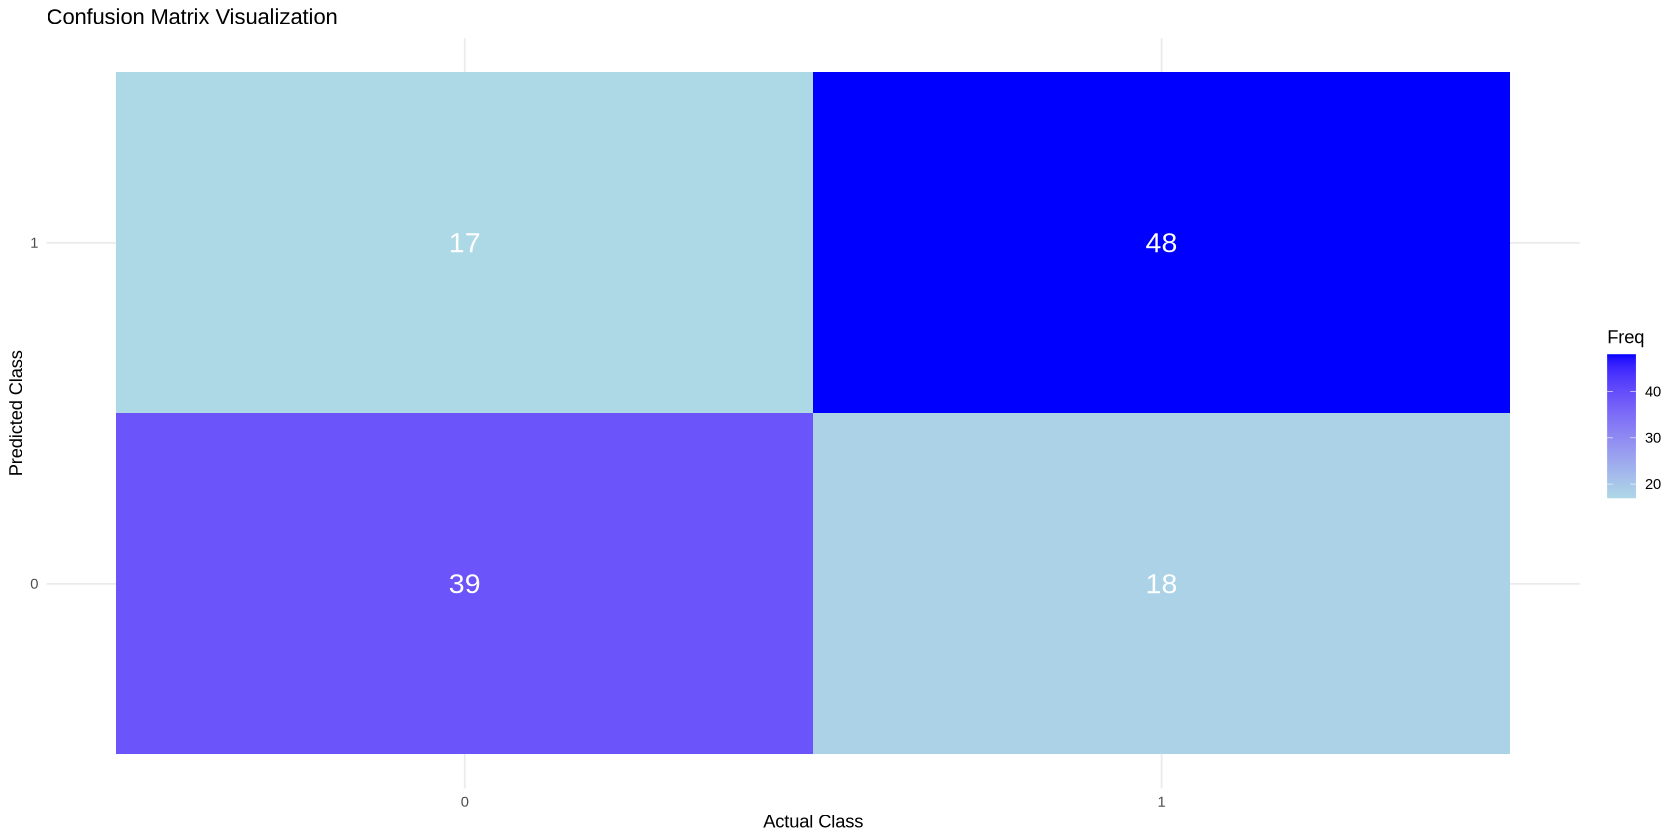

In [8]:
conf_matrix_table <- as.data.frame(confusion_matrix$table)  #confusion matrix plot for Single Train-Test Split Model
colnames(conf_matrix_table) <- c("Prediction", "Actual", "Freq")

ggplot(conf_matrix_table, aes(x = Actual, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "white", size = 6) +
  scale_fill_gradient(low = "lightblue", high = "blue") +
  labs(title = "Confusion Matrix Visualization",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal()

Based on the confusion matrix derived from cross-validation, we can extract the following insights:

- True Positives (TP): The model correctly identified 76 cases where employees have a salary above the median.
- True Negatives (TN): The model correctly identified 78 cases where employees have a salary below the median.
- False Positives (FP): There were 227 instances where the model incorrectly predicted employees to have a salary above the median when they actually do not.
- False Negatives (FN): The model failed to identify 226 cases where employees have a salary above the median.
  
With an accuracy of 74.63%, the model demonstrates moderate performance in distinguishing between salaries above and below the median. However, the large number of false positives and false negatives indicates significant room for improvement. In particular, the model struggles to correctly identify employees whose salaries are above the median, as reflected in the high number of false negatives. This imbalance suggests that the current feature set or model might lack sufficient discriminatory power to effectively separate the two salary classes.


### (3) Discussion

The results of your findings are that;
1. Smaller companies may want to offer competitive wages to attract high-quality candidates. It will lead to a lower employee-turnover rate and an increased commitment from employees.
2. The working class individuals seeking higher salaries may want to pursue senior or executive roles.


The results aligned with our expectations based on our practical industry knowledge. Higher experience levels and larger company sizes significantly increased salaries, consistent with industry trends. This could be explained by the greater amount of resources that are available in large-size companies as well as a greater skill-set in experienced individuals. Employment type's influence on salary also matched our pre-existing knowledge.

Future improvements could focus on expanding the feature set to enhance the model's predictive capability. Currently, the model relies on three features: experience_level, employment_type, and company_size. While these are relevant, they may not fully capture the complex relationships in the data. Incorporating additional features, such as job_title, which reflects salary trends across different roles, or remote_ratio, which may reveal the impact of remote work on salary, could provide a richer representation of the data. Additionally, including work_year could capture temporal effects and trends that influence salary changes over time.

We in the future might examine how gender, ethnicity, and other diversity factors influence salary and opportunities for advancement in data science. We could examine the other factors that influence the pay disparity between small and big size companies or that how do salary distributions vary across different regions.

In conclusion, study examined how experience level, employment type, and company size impact salaries in data-related jobs. Higher experience levels and being employed at larger companies significantly increased the likelihood of earning above the median salary, while freelance and part-time roles tended to yield lower earnings. The logistic regression model showed reasonable accuracy of 74%, though variability in some predictors suggests areas for improvement. These insights can guide career planning and compensation strategies, with future research exploring additional factors and refining predictive models for a deeper understanding of salary dynamics.

### (4) References

- Bhatia, R. (2022). Data Science Job Salaries. Www.kaggle.com.
	https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data

- Shambrook, J., Roberts, T. J., & Triscari, R. (2011). Research administrator salary: Association with education, experience, 
credentials, and gender. Journal of Research Administration, 42(2), 87–99.
 https://files.eric.ed.gov/fulltext/EJ955024.pdf

- Molina-Domene, M. (2018). Specialization Matters in the Firm Size-Wage Gap.
 https://cep.lse.ac.uk/pubs/download/dp1545.pdf